In [6]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("FINAL_USO.csv")

# Xem 5 dòng đầu tiên
print(df.head())


         Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3  2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4  2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

     Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0  21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1  18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2  12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3   9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4  11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   

   GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_C

In [2]:
# Kiểm tra kích thước và kiểu dữ liệu
print(df.info())

# Kiểm tra dữ liệu bị thiếu
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

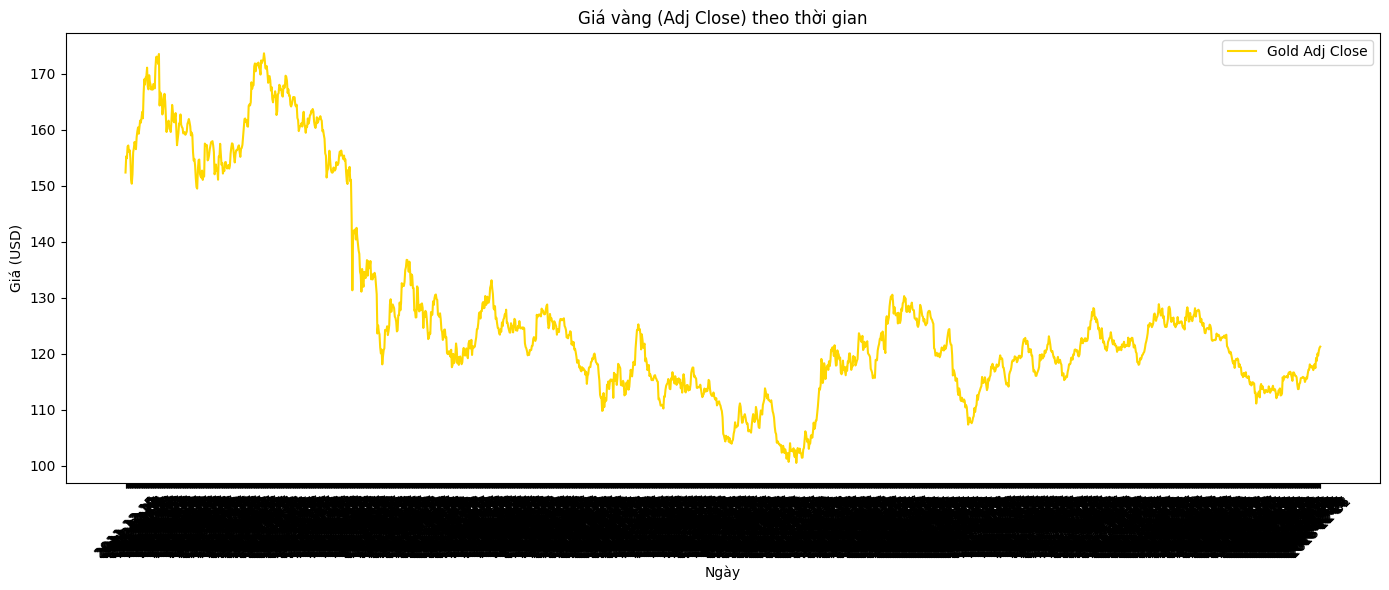

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Adj Close'], label='Gold Adj Close', color='gold')
plt.title('Giá vàng (Adj Close) theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Giá (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


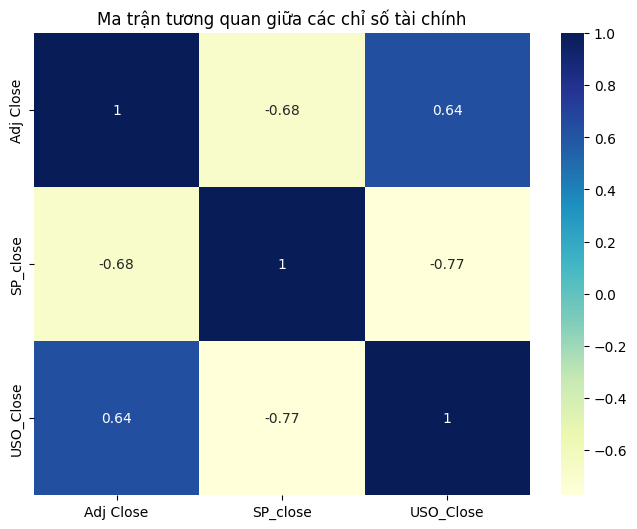

In [4]:
import seaborn as sns

cols = ['Adj Close', 'SP_close', 'USO_Close']
plt.figure(figsize=(8, 6))
sns.heatmap(df[cols].corr(), annot=True, cmap='YlGnBu')
plt.title('Ma trận tương quan giữa các chỉ số tài chính')
plt.show()


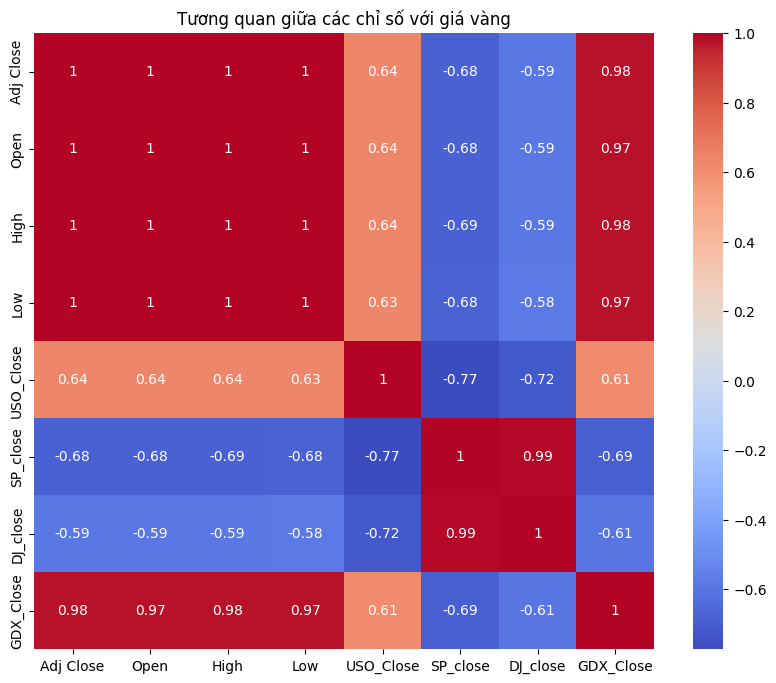

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Adj Close', 'Open', 'High', 'Low', 'USO_Close', 'SP_close', 'DJ_close', 'GDX_Close']
plt.figure(figsize=(10, 8))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Tương quan giữa các chỉ số với giá vàng")
plt.show()


In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Đảm bảo 'Date' là datetime và đặt làm index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Chọn các cột có tương quan cao/đáng chú ý
selected_cols = ['Adj Close', 'Low', 'High', 'GDX_Close', 'SP_close', 'DJ_close', 'USO_Close']

# Lọc data
data = df[selected_cols].copy()

# Chuẩn hóa dữ liệu để LSTM học tốt hơn (0 - 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Chuyển lại thành DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=selected_cols, index=data.index)

# Hiển thị 5 dòng đầu
print(scaled_df.head())


            Adj Close       Low      High  GDX_Close  SP_close  DJ_close  \
Date                                                                       
2011-12-15   0.708932  0.708213  0.738369   0.871333  0.010907  0.006808   
2011-12-16   0.748598  0.738341  0.744116   0.893556  0.007502  0.006648   
2011-12-19   0.743674  0.744669  0.750821   0.860000  0.000000  0.000000   
2011-12-20   0.772534  0.775210  0.772304   0.900444  0.021005  0.022395   
2011-12-21   0.774997  0.769019  0.773673   0.899778  0.022390  0.022671   

            USO_Close  
Date                   
2011-12-15   0.827313  
2011-12-16   0.831424  
2011-12-19   0.829369  
2011-12-20   0.869310  
2011-12-21   0.885463  


In [12]:
len(scaled_df)

1718

In [31]:
# Dữ liệu đã đặt 'Date' làm index ở bước trước rồi
import numpy as np
# Tách tập train/test theo mốc thời gian
train_df = scaled_df.loc[:'2016-12-31']
test_df = scaled_df.loc['2017-01-01':]

# Tạo lại X, y cho từng tập riêng biệt
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data.iloc[i-lookback:i].values)
        y.append(data.iloc[i]['Adj Close'])
    return np.array(X), np.array(y)

lookback = 90
X_train, y_train = create_sequences(train_df, lookback)
X_test, y_test = create_sequences(test_df, lookback)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")


Train: (1132, 90, 7), Test: (406, 90, 7)


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Dự đoán giá vàng

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


c:\Users\Admin\miniconda3\envs\my-env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 90, 64)         │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 90, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,521 (201.25 KB)

 Trainable params: 51,521 (201.25 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size= 16,
    validation_data=(X_test, y_test)
)


Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0013 - val_loss: 0.0045
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0014 - val_loss: 0.0115
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0015 - val_loss: 0.0047
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9.9095e-04 - val_loss: 0.0039
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0014 - val_loss: 0.0047
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 9.6305e-04 - val_loss: 0.0038
Epoch 9/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0010 - val_loss: 0.0060
Epoch 10/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0010 - val_loss: 0.0042
Epoch 11/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 12/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - l

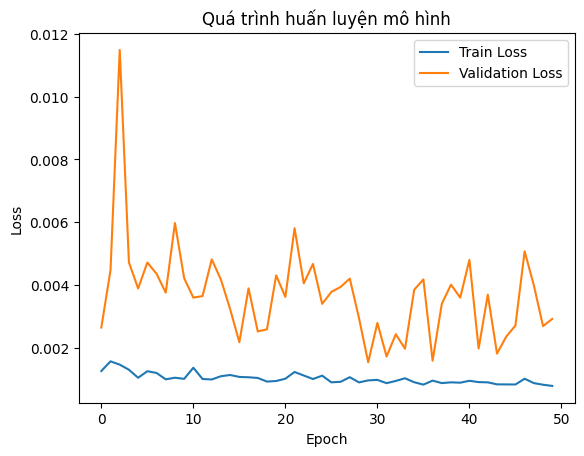

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Quá trình huấn luyện mô hình')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [51]:
# Dự đoán
y_pred_scaled = model.predict(X_test)

# Chỉ đảo ngược chuẩn hóa cột 'Adj Close'
# Lấy scaler đã fit toàn bộ dataframe
adj_close_index = list(scaled_df.columns).index('Adj Close')

# Tạo mảng tạm để inverse transform
import numpy as np
y_test_full = np.zeros((len(y_test), scaled_df.shape[1]))
y_pred_full = np.zeros((len(y_pred_scaled), scaled_df.shape[1]))

y_test_full[:, adj_close_index] = y_test
y_pred_full[:, adj_close_index] = y_pred_scaled[:, 0]

# Đảo ngược chuẩn hóa
y_test_inv = scaler.inverse_transform(y_test_full)[:, adj_close_index]
y_pred_inv = scaler.inverse_transform(y_pred_full)[:, adj_close_index]


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


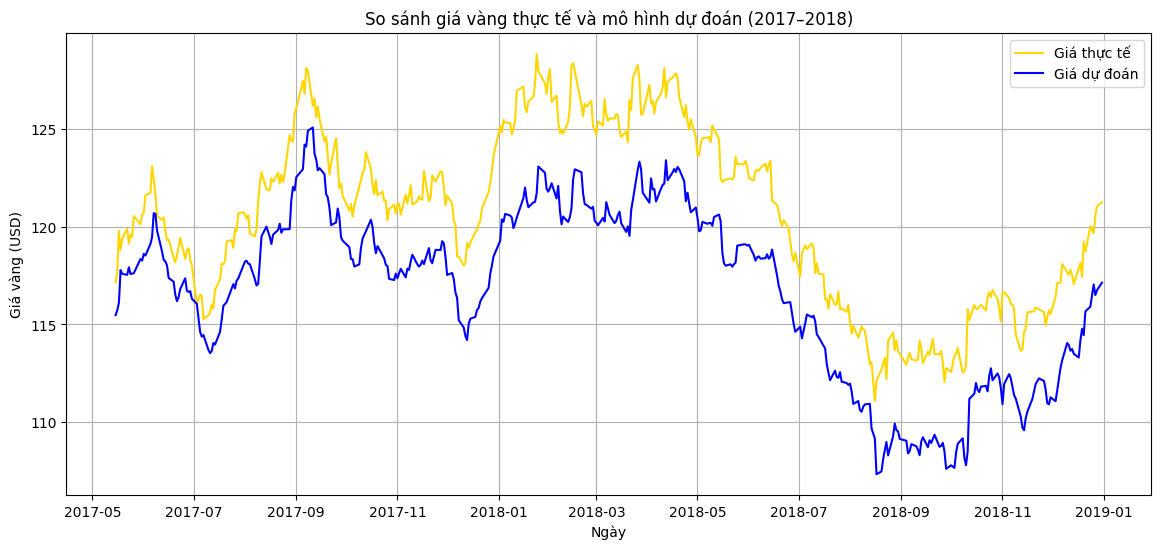

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(test_df.index[lookback:], y_test_inv, label='Giá thực tế', color='gold')
plt.plot(test_df.index[lookback:], y_pred_inv, label='Giá dự đoán', color='blue')
plt.title('So sánh giá vàng thực tế và mô hình dự đoán (2017–2018)')
plt.xlabel('Ngày')
plt.ylabel('Giá vàng (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def prepare_data(df, lookback=60):
    data = df.copy()
    
    # Chuẩn hóa dữ liệu
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i-lookback:i])
        y.append(scaled_data[i, 0])  # giả sử cột đầu là giá vàng

    X, y = np.array(X), np.array(y)

    # Chia tập train/test (80/20)
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    return X_train, y_train, X_test, y_test, scaler

def build_model_func(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_lookbacks(lookback_values, data, build_model_func, epochs=20, batch_size=32):
    results = {}
    for lb in lookback_values:
        print(f"Đang train với lookback = {lb} ...")
        
        # Chuẩn bị dữ liệu
        X_train, y_train, X_test, y_test, scaler = prepare_data(data, lookback=lb)
        
        # Xây mô hình LSTM
        model = build_model_func(input_shape=(X_train.shape[1], X_train.shape[2]))
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
        
        # Dự đoán
        predicted = model.predict(X_test)
        predicted_rescaled = scaler.inverse_transform(np.concatenate((predicted, np.zeros((predicted.shape[0], data.shape[1]-1))), axis=1))[:, 0]
        y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data.shape[1]-1))), axis=1))[:, 0]
        
        # Tính RMSE
        rmse = sqrt(mean_squared_error(y_test_rescaled, predicted_rescaled))
        results[lb] = rmse
        print(f"Lookback: {lb} - RMSE: {rmse:.2f}")
    
    # Trực quan hóa
    plt.plot(list(results.keys()), list(results.values()), marker='o')
    plt.xlabel('Lookback')
    plt.ylabel('RMSE')
    plt.title('So sánh RMSE theo Lookback')
    plt.grid(True)
    plt.show()
    
    return results


Đang train với lookback = 30 ...


c:\Users\Admin\miniconda3\envs\my-env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Lookback: 30 - RMSE: 3.06
Đang train với lookback = 60 ...


c:\Users\Admin\miniconda3\envs\my-env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Lookback: 60 - RMSE: 2.58
Đang train với lookback = 90 ...


c:\Users\Admin\miniconda3\envs\my-env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Lookback: 90 - RMSE: 1.24
Đang train với lookback = 120 ...


c:\Users\Admin\miniconda3\envs\my-env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Lookback: 120 - RMSE: 1.63
Đang train với lookback = 150 ...


c:\Users\Admin\miniconda3\envs\my-env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Lookback: 150 - RMSE: 1.78


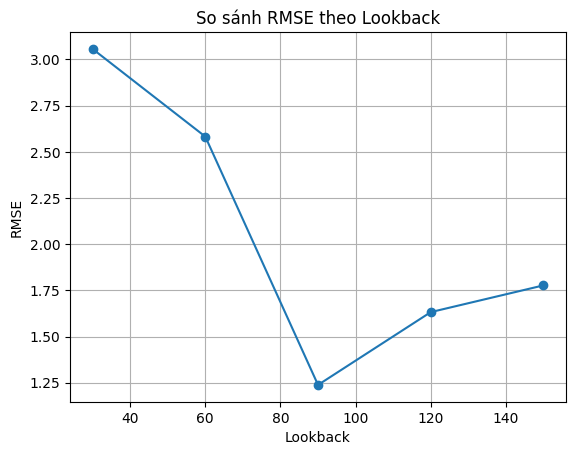

In [30]:
lookback_values = [30, 60, 90, 120, 150]
results = evaluate_lookbacks(lookback_values, df[['Adj Close', 'Open', 'High', 'Low', 'USO_Close', 'SP_close', 'DJ_close', 'GDX_Close']], build_model_func)
